<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt

In [2]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [3]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [4]:
dataset[:100:10]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
10,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario FEDERAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Federal,CPF Nº 2 MARCOS PAZ,NaN
20,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Segregación / Confinamiento,Golpes,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP N° 30 de Alvear,NaN
30,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Comisaría,NaN,NaN,NaN,NaN,NaN,"Denegación acceso atención médica, Falta de ad...",NaN,Policia Provincial,NaN,NaN
40,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,NaN,NaN
50,DNPCVI,SECRETARIA DE DDHH,Telefónica,NaN,Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,Restricción injustificada derechos al trabajo ...,NaN,NaN,NaN,Servicio Penitenciario Federal,NaN,NaN
60,Centro de Denuncias,SECRETARIA DE DDHH,Personal,2014,Ciudad de Buenos Aires,Situaciones de Detención,Centros de Detención Previos al Juicio (Alcaidia),Ingreso / Admisión,NaN,NaN,Otras formas de maltrato psicológico,NaN,Interrupción / Mala administración de medicaci...,NaN,Servicio Penitenciario Federal,NaN,NaN
70,Centro de Denuncias,SECRETARIA DE DDHH,Telefónica,2014,Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario FEDERAL,NaN,Hurto / Robo de pertenencias,NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Federal,NaN,NaN
80,Centro de Denuncias,SECRETARIA DE DDHH,Telefónica,2014,Salta,Situaciones de Detención,Penal / Complejo Penitenciario FEDERAL,NaN,NaN,NaN,NaN,NaN,Intervención médica forzada,NaN,Servicio Penitenciario Federal,U.16 SEÑOR Y VIRGEN DEL MILAGRO,NaN
90,Centro de Denuncias,SECRETARIA DE DDHH,Telefónica,2003,Ciudad de Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario FEDERAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Federal,NaN,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [5]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)

In [6]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

### Distribución de los eventos por año

AttributeError: 'AxesSubplot' object has no attribute 'value_counts'

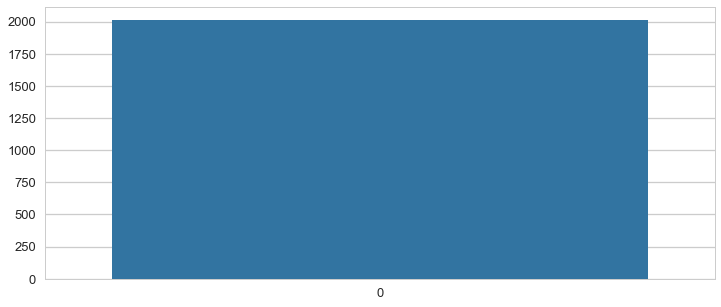

In [81]:
years_without_nan = dataset.year.dropna()

MIN_YEAR = years_without_nan.min()
MAX_YEAR = years_without_nan.max()
YEARS_RANGE = [MIN_YEAR, MAX_YEAR]

def distribution_by_year():
    _, ax = plt.subplots(figsize=(12, 5))

    seaborn.barplot(data=years_without_nan).value_counts(normalize=True)
    # Drop nan values from year column and plot a distribution of events by year
#    seaborn.distplot(years_without_nan, kde=False, ax=ax)

distribution_by_year()

#### Con una aproximación a la fdp generada automáticamente

In [79]:
_, ax_year = plt.subplots(figsize=(12, 5))

seaborn.distplot(years_without_nan)

TypeError: draw_wrapper() missing 1 required positional argument: 'renderer'

### Tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

In [9]:
# Drop nan values and only count unique values
fdps_year = dataset.year.value_counts(normalize=True, dropna=True)
fdps_year.to_frame()

,year
2016.0,0.225684
2013.0,0.216565
2014.0,0.183131
2017.0,0.177812
2015.0,0.066109
2012.0,0.047112
2010.0,0.015957
2011.0,0.012158
2009.0,0.007599
2003.0,0.006839


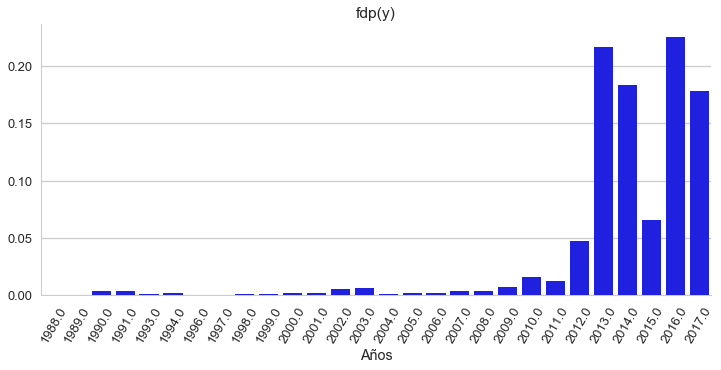

In [10]:
_, ax_year = plt.subplots(figsize=(12, 5))

seaborn.barplot(
    data=fdps_year.to_frame().reset_index(),
    x='index',
    y='year',
    color='blue',
    orient='v'
)

# Configure axes
ax_year.set_title('fdp(y)')
ax_year.set_xticklabels(ax_year.get_xticklabels(), rotation=60)
ax_year.set_xlabel('Años')
ax_year.set_ylabel('')

seaborn.despine()

### ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

* La forma de la distribución se debe a los distintos cambios de gobiernos, los picos corresponden al segundo y tercer año de cada gobierno mientras que los valores “bajos” se registran en período de elecciones. Si analizamos cada gobierno de manera individual y registraramos los hechos de violencia por mes a los largo de 4 años, la distribución podría tendencia normal.
* La tendencia de los datos muestra que durante cada gobierno, la violencia institucional crece llegando a un pico que suele disminuir durante las elecciones del ultimo año. Esto se ve reflejado claramente en los graficos observando los ultimos tres gobiernos.
* La violencia institucional ha crecido en los últimos años, pero no podemos asegurar que la razón sea por existir más casos de violencia, sino que puede ser debido a que hay más registros de los mismos en comparación con los años donde no existían políticas y herramientas que permitieran registrar estos casos.


### Funcion de distribución acumulada para la variable Y = 'Año en el que ocurrió

#### ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?
  Tomando como referencia el gráfico de distribución acumulada, la probabilidad de haya dado un acto de violencia antes del ultimo cambio de gobierno fue cercano a un 60%.

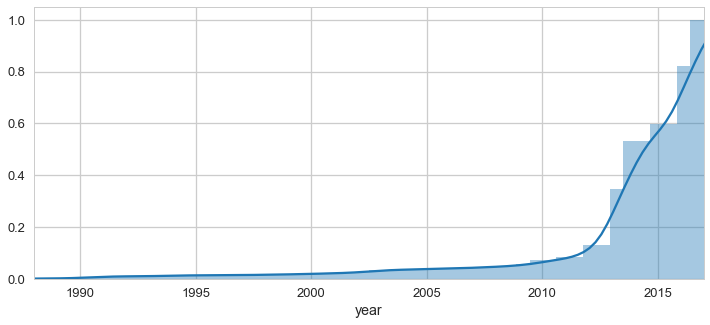

In [66]:
_, ax_year = plt.subplots(figsize=(12, 5))
ax_year.set_xlim(YEARS_RANGE)
seaborn.distplot(dataset.year.dropna(), hist_kws={'cumulative': True}, kde_kws={'cumulative': True})

### ¿ Que hacemos con los datos faltantes ?

 Si nos referimos a los eventos en los cuales no se registró el año (NaN), estos son descartados por que no pueden ser agrupados en ninguna categoría y por ende no aportan información relevante al ámbito del problema.

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

### Tabla de frecuencia de  probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

In [12]:
# Drop nan values and only count unique values
fdps_province = dataset.provincia.value_counts(normalize=True, dropna=True)
fdps_province.to_frame()

,provincia
Buenos Aires,0.693182
Ciudad de Buenos Aires,0.083097
Córdoba,0.036932
Chubut,0.026278
Chaco,0.020597
Rio Negro,0.019176
Neuquen,0.014915
Santa Fe,0.014205
Mendoza,0.012074
Salta,0.012074


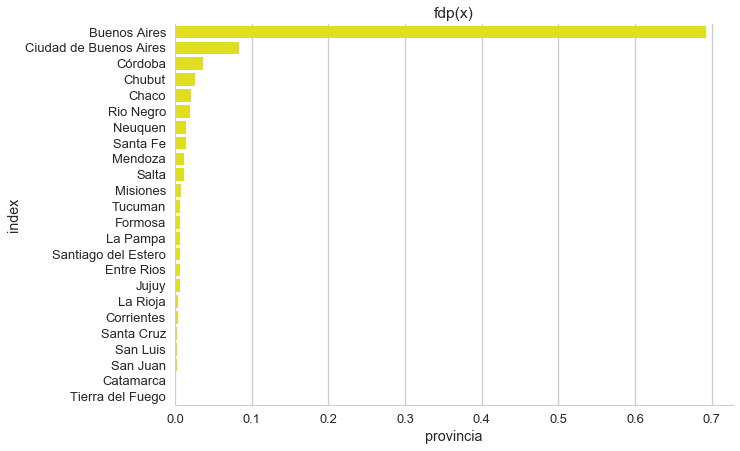

In [13]:
# Plot the table
_, ax_province = plt.subplots(figsize=(10, 7))

# Configure axes
ax_province.set_title('fdp(x)')
ax_province.set_xlabel('')
ax_province.set_ylabel('Provincia')

seaborn.barplot(
    data=fdps_province.to_frame().reset_index(),
    x='provincia',
    y='index',
    color='yellow',
    orient='h',
    ax=ax_province
)

seaborn.despine()

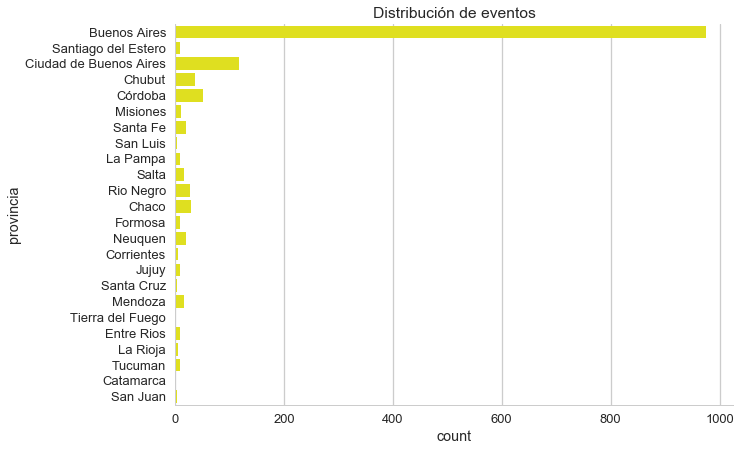

In [14]:
# Plot event distribution
_, ax_province = plt.subplots(figsize=(10, 7))
ax_province.set_title('Distribución de eventos')

seaborn.countplot(
    data=dataset.provincia.dropna().to_frame(),
    y='provincia',
    color='yellow',
    ax=ax_province
)

seaborn.despine()

### ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?

Para mostrar estos datos de una manera más adecuada, haría falta como información adicional el año en el que ocurrieron los hechos, es decir, agrupar las hechos primero por año, y luego mostrar la distribución por provincias.

Al no tener en cuenta el año de ocurrencia, se podría sesgar a quien visualice esta tabla, ya que los hechos registrados ocurren a lo largo de 29 años.

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


### Tabla de distribución de probabilidad para las variables X e Y

In [15]:
pandas.crosstab(dataset.provincia, dataset.year).apply(lambda r: r/r.sum(), axis=0)


year,1988.0,1989.0,1990.0,1991.0,1993.0,1994.0,1996.0,1997.0,1998.0,1999.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
provincia,,,,,,,,,,,,,,,,,,,,,
Buenos Aires,0.0,1.0,0.0,0.6,0.0,0.333333,0.0,0.0,0.0,0.0,...,0.6,0.4,0.380952,0.5625,0.344262,0.700000,0.691983,0.563218,0.784512,0.799145
Catamarca,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.003367,0.000000
Chaco,0.0,0.0,0.8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0000,0.114754,0.028571,0.012658,0.034483,0.010101,0.004274
Chubut,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.142857,0.0000,0.049180,0.021429,0.037975,0.022989,0.006734,0.029915
Ciudad de Buenos Aires,1.0,0.0,0.0,0.4,0.0,0.000000,1.0,1.0,0.5,0.0,...,0.2,0.5,0.047619,0.1250,0.163934,0.082143,0.101266,0.114943,0.037037,0.051282
Corrientes,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0000,0.000000,0.007143,0.000000,0.011494,0.003367,0.000000
Córdoba,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.095238,0.1875,0.065574,0.017857,0.016878,0.149425,0.037037,0.042735
Entre Rios,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0000,0.016393,0.000000,0.033755,0.000000,0.000000,0.000000
Formosa,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0000,0.000000,0.010714,0.012658,0.011494,0.003367,0.004274


#### ¿Son eventos independientes?

Los eventos no son independientes basados en la ecuación:

p ( xi , y j ) = p ( x i ) q ( y j ) ∀ ( x i , y j ) ∈ R XY

Por ejemplo si tomamos la provincia de Buenos Aires durante el año 2016, entonces sean
A = "Probabilidad de que el evento haya sucedido en la Provinvia de Buenos Aires"
B = "Probabilidad de que el evento haya sucedido en el año 2016"
C = "Probabilidad de que el evento haya sucedido en la provincia de Buenos Aires durante el año 2016"

P(C) = P(A $\cap$ B) = P(A) * P(B)

Basándonos en los calculos anteriores


In [16]:
pC = 0.784512 # Ocurrió en Bs. As. durante el 2016
pA = 0.693182 # Ocurrió en Bs As.
pB = 0.225684 # Ocurrió en 2016
pAB = pA * pB

print('Son independientes ? {}'.format(pC == pAB))
print('pC = {}, pAB = {}'.format(pC, pAB))

Son independientes ? False
pC = 0.784512, pAB = 0.15644008648799998


/Users/juannorris/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


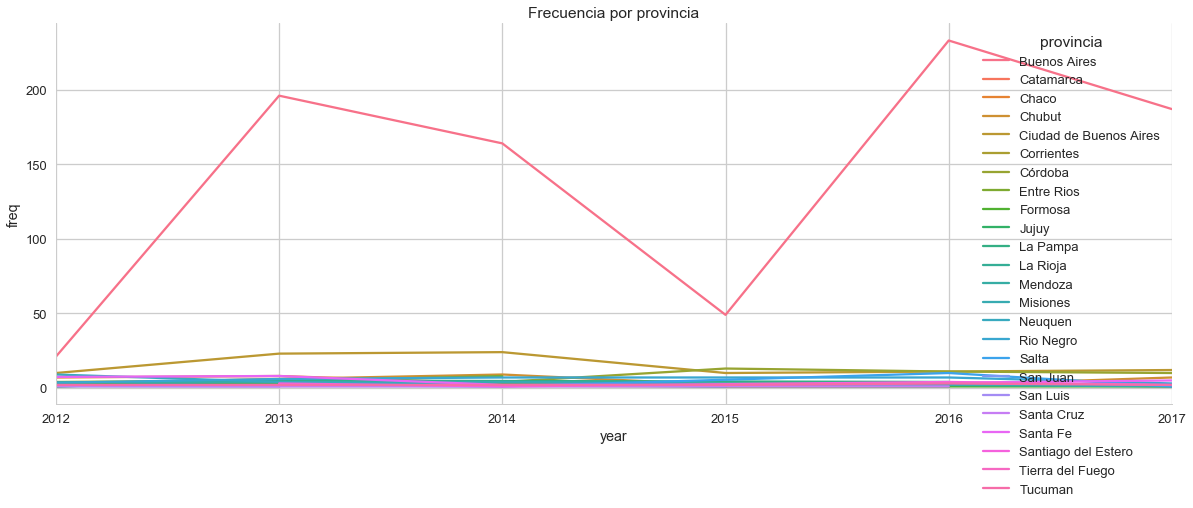

In [32]:
_, ax_freq = plt.subplots(figsize=(20, 7))
ax_freq.set_title('Frecuencia por provincia')

groupedByStateAndYear = dataset.groupby(['provincia', 'year']).size().reset_index(name='freq')
seaborn.tsplot(data=groupedByStateAndYear, time='year', unit = "provincia", condition='provincia', value='freq')
seaborn.despine()

## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

In [18]:
dataset['contexto1'].drop_duplicates()


0               Penal / Complejo Penitenciario PROVINCIAL
3                                               Comisaría
10                 Penal / Complejo Penitenciario FEDERAL
19                                        Espacio Público
42               Instalaciones de la Gendarmería Nacional
54                                   Domicilio Particular
56                                       Hospital General
60      Centros de Detención Previos al Juicio (Alcaidia)
157                                                   NaN
166                                 Lugar No Identificado
183     Móviles y medios de transporte de Fuerzas de S...
524     Centros de Alojamiento para Personas Menores d...
567     Instalaciones de las Fuerzas Armadas (cuartele...
568              Escuelas de Formación Fuerzas Nacionales
768                       Establecimiento de Salud Mental
774            Escuelas de Formación Fuerzas Provinciales
786       Establecimiento de Rehabilitación de Adicciones
1307          

In [19]:
security_context = dataset['contexto1'].iloc[19, 54, 56, 157, 166, 768]


IndexingError: Too many indexers

## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(N~~|~~M)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?